In [ ]:
GMMなどのモデリングのツールをさがす。

Processing系のツールをぜひ使いたいが、WinPythonには何が含まれているのか。

In [1]:
#/usr/local/lib/python3.4/site-packages/nodebox/graphics/bezier.py
from nodebox.graphics import *
from nodebox.graphics.physics import Flock
  
flock = Flock(40, 0, 0, 500, 500)
flock.sight = 300
  
def draw(canvas):
    background(1)
    fill(0, 0.75)
    flock.update(cohesion=0.15)
    for boid in flock:
        push()
        translate(boid.x, boid.y)
        scale(0.5 + 1.5 * boid.depth)
        rotate(boid.heading)
        arrow(0, 0, 15)
        pop()
      
canvas.fps = 30
canvas.size = 600, 400
canvas.run(draw)

ImportError: No module named 'bezier'

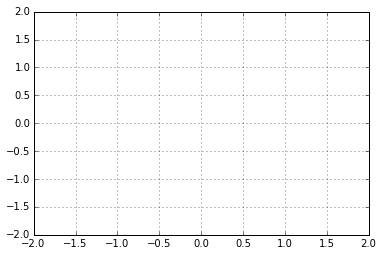

In [1]:
%matplotlib inline
from numpy import sin, cos, pi, array
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as integrate
import matplotlib.animation as animation

G =  9.8 # acceleration due to gravity, in m/s^2
L1 = 1.0 # length of pendulum 1 in m
L2 = 1.0 # length of pendulum 2 in m
M1 = 1.0 # mass of pendulum 1 in kg
M2 = 1.0 # mass of pendulum 2 in kg


def derivs(state, t):

    dydx = np.zeros_like(state)
    dydx[0] = state[1]

    del_ = state[2]-state[0]
    den1 = (M1+M2)*L1 - M2*L1*cos(del_)*cos(del_)
    dydx[1] = (M2*L1*state[1]*state[1]*sin(del_)*cos(del_)
               + M2*G*sin(state[2])*cos(del_) + M2*L2*state[3]*state[3]*sin(del_)
               - (M1+M2)*G*sin(state[0]))/den1

    dydx[2] = state[3]

    den2 = (L2/L1)*den1
    dydx[3] = (-M2*L2*state[3]*state[3]*sin(del_)*cos(del_)
               + (M1+M2)*G*sin(state[0])*cos(del_)
               - (M1+M2)*L1*state[1]*state[1]*sin(del_)
               - (M1+M2)*G*sin(state[2]))/den2

    return dydx

# create a time array from 0..100 sampled at 0.05 second steps
dt = 0.05
t = np.arange(0.0, 20, dt)

# th1 and th2 are the initial angles (degrees)
# w10 and w20 are the initial angular velocities (degrees per second)
th1 = 120.0
w1 = 0.0
th2 = -10.0
w2 = 0.0

rad = pi/180

# initial state
state = np.array([th1, w1, th2, w2])*pi/180.

# integrate your ODE using scipy.integrate.
y = integrate.odeint(derivs, state, t)

x1 = L1*sin(y[:,0])
y1 = -L1*cos(y[:,0])

x2 = L2*sin(y[:,2]) + x1
y2 = -L2*cos(y[:,2]) + y1

fig = plt.figure()
ax = fig.add_subplot(111, autoscale_on=False, xlim=(-2, 2), ylim=(-2, 2))
ax.grid()

line, = ax.plot([], [], 'o-', lw=2)
time_template = 'time = %.1fs'
time_text = ax.text(0.05, 0.9, '', transform=ax.transAxes)

def init():
    line.set_data([], [])
    time_text.set_text('')
    return line, time_text

def animate(i):
    thisx = [0, x1[i], x2[i]]
    thisy = [0, y1[i], y2[i]]

    line.set_data(thisx, thisy)
    time_text.set_text(time_template%(i*dt))
    return line, time_text

ani = animation.FuncAnimation(fig, animate, np.arange(1, len(y)),
    interval=25, blit=True, init_func=init)

#ani.save('double_pendulum.mp4', fps=15)
plt.show()

http://jakevdp.github.io/blog/2013/05/12/embedding-matplotlib-animations/

NameError: name 'display_animation' is not defined

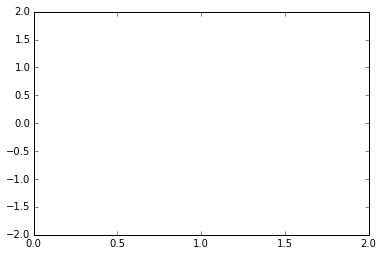

In [2]:

from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=100, interval=20, blit=True)

# call our new function to display the animation
display_animation(anim)

http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/
これはビデオを生成してくれる。しかし、IPYthon notebookの中でアニメーションする方法はまだ不明。だいたい、グラフしか描けてない。もっと自由な作画をしたいが、WinPythonではライブラリの追加もままならない。

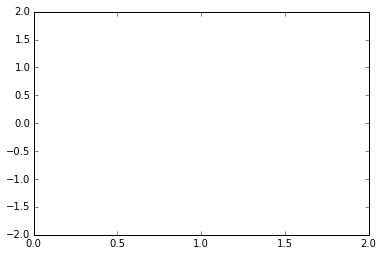

In [4]:
"""
Matplotlib Animation Example

author: Jake Vanderplas
email: vanderplas@astro.washington.edu
website: http://jakevdp.github.com
license: BSD
Please feel free to use and modify this, but keep the above information. Thanks!
"""

import numpy as np
from matplotlib import pyplot as plt
from matplotlib import animation

# First set up the figure, the axis, and the plot element we want to animate
fig = plt.figure()
ax = plt.axes(xlim=(0, 2), ylim=(-2, 2))
line, = ax.plot([], [], lw=2)

# initialization function: plot the background of each frame
def init():
    line.set_data([], [])
    return line,

# animation function.  This is called sequentially
def animate(i):
    x = np.linspace(0, 2, 1000)
    y = np.sin(2 * np.pi * (x - 0.01 * i))
    line.set_data(x, y)
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=200, interval=20, blit=True)

# save the animation as an mp4.  This requires ffmpeg or mencoder to be
# installed.  The extra_args ensure that the x264 codec is used, so that
# the video can be embedded in html5.  You may need to adjust this for
# your system: for more information, see
# http://matplotlib.sourceforge.net/api/animation_api.html

anim.save('basic_animation.mp4', fps=30, extra_args=['-vcodec', 'libx264'])

plt.show()

VPython (visual python)が一番目的に近そうだ。